# Evaluate Model

---

## init


In [17]:
! pip install pandas
! pip install transformers
! pip install seaborn
! pip install matplotlib
! pip install numpy
! pip install evaluate

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import pipeline
import evaluate

/Users/tree/miniconda3/envs/Ki-Lab3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# paths
root = './'
driveFolder = root + 'trainingRuns/TrainRuns-DriveSync/'
runFolder = '22_12_05_Run_04_E10_BS_2_TopRapBoth/'
trainingBothCsv = driveFolder + runFolder + 'training_stats_both.csv'
trainingRapCsv = driveFolder + runFolder + 'training_stats_rap.csv'
trainingTopCsv = driveFolder + runFolder + 'training_stats_top.csv'
savedModelBoth = driveFolder + runFolder + 'model_save/both/'
savedModelRap = driveFolder + runFolder + 'model_save/rap/'
savedModelTop = driveFolder + runFolder + 'model_save/top/'
testLyricsCsv = root + 'datasets/lyrics_test_samples.csv'

---

## Load training results

In [4]:
# load trainin.csv
df_stats = pd.read_csv(trainingTopCsv)
df_stats = df_stats.set_index('epoch')
df_stats.head()

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,2.176176,1.303955,0:07:29,0:00:14
2,1.347894,1.259068,0:07:26,0:00:14
3,1.301242,1.224136,0:07:28,0:00:14
4,1.267759,1.208877,0:07:25,0:00:14
5,1.241236,1.199837,0:07:25,0:00:14


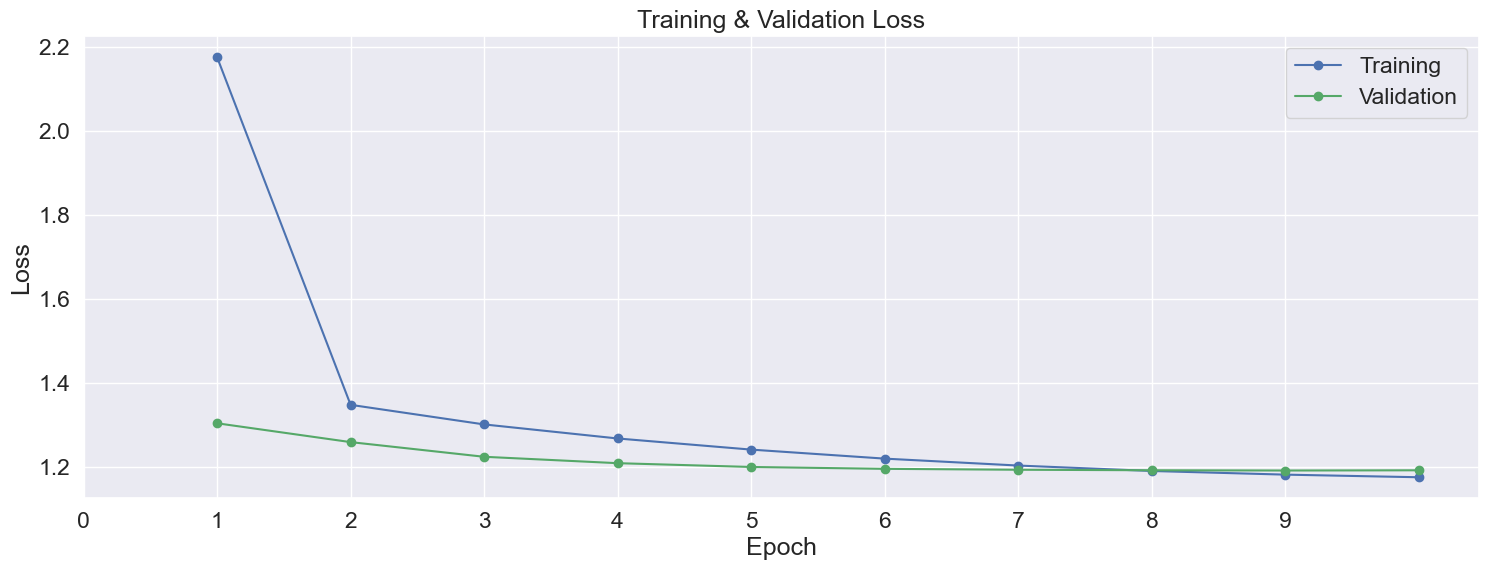

In [5]:
# Plot graph
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (18,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(np.arange(len(df_stats)))

plt.show()

---

## Load model


### Load trained model

In [24]:
# load model from file
tokenizer = GPT2Tokenizer.from_pretrained('gpt2') #gpt2-medium
model = GPT2LMHeadModel.from_pretrained(savedModelTop)

model.resize_token_embeddings(len(tokenizer))

Embedding(50257, 768)

In [45]:
# pipline for text generation

lyrics_pipeline = pipeline('text-generation',model=model, tokenizer=tokenizer)

song_input = 'can you generate me some songlyrics\n'

result = lyrics_pipeline(song_input, max_length=1024,min_length=512)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [46]:
print(result)

can you generate me some songlyrics

you need a good backup, my song lyrics are also on the backburner and should be edited in the same way on my album as well


I hope you find my song lyrics helpful. Also to let me know if you try writing something else on your page or not


Thanks as much as you do!


*I'll post a short message to tell you what is currently in progress in our band, I'd love to hear from you!Thanks as much as you do!

Kurono (RiffTrax)

Jun 14th, 2015 ( edit ) 15 posts

Elderly to You.

Punishers

M.L.

Sugarhill

Reef-Man

No-Breather

I Don't Want To Go


Post Extras:


I have some good information, what you say in the same sentence may sound funny, but I never wrote the lyrics. I had a hard time thinking that would be in the same sentence...


If you like the songs sound awesome and have a good review I highly recommend this site.


--------------------


When I was 12, a friend and I just found out about Jeff's band in Las Vegas who they called Dream Theater. Thi

In [47]:
x = tokenizer(result)

In [48]:
print(len(x['input_ids']))

1022


### load vanilla gpt2 to compare

In [6]:
## load vanilla GPT2 from huggingface
tokenizerGPT2 = GPT2Tokenizer.from_pretrained('gpt2') #gpt2-medium
modelGPT2 = GPT2LMHeadModel.from_pretrained('gpt2')

modelGPT2.resize_token_embeddings(len(tokenizerGPT2))

Embedding(50257, 768)

In [7]:
# pipline for text generation
gpt_pipeline = pipeline('text-generation',model=modelGPT2, tokenizer=tokenizerGPT2)

song_input = 'can you generate me some songlyrics\n'

gpt2Result = gpt_pipeline(song_input, max_length=1024,min_length=512)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [9]:
print(gpt2Result)

can you generate me some songlyrics

But here is where he's playing at this moment. It sounds kind of off but as far as he's concerned he's playing the same tune for four or five minutes.

As he takes some deep breaths, the song changes and it kind of bounces off the board. With the right notes he wins the game, it doesn't matter how many times you're wrong or how it sounds when you played it. I knew it would be there, but how do I tell it doesn't seem like he intended it to be that way.

It might just be that I was just trying to get a chance and not have one of those moments where he might call to me, 'Do you come back?' It's just that I think there was a bit more of a sense here that I needed that moment. You know, you'll have a chance like that if you're not careful and take proper care of your playing as a drummer, not only in the room but in the community and to be more of an artist.

It kind of makes sense at least because these guys have said it before. There are some big names

---

## Calculate BLEU Score

In [20]:
lyrics_test_df = pd.read_csv(testLyricsCsv)
lyrics_test_df = lyrics_test_df.drop(['Unnamed: 0'], axis=1)

In [21]:
lyrics_test_df.head()

,Lyrics,True_end_lyrics,Lyrics_Cut
0,The Queen of Light took her bow And then she t...,now Bring it bring it bring it bring it Bring ...,The Queen of Light took her bow And then she t...
1,Rhiannon rings like a bell through the night A...,by taken by the sky Taken by taken by the sky ...,Rhiannon rings like a bell through the night A...
2,TranslationsPortugus Swaying room as the music...,crazy for you And you know its true Yeah Im cr...,TranslationsPortugus Swaying room as the music...
3,Louise take it all back to town Aint it a sham...,do Louise Louise ooh Ooh ooh ooh oh Louise ooh...,Louise take it all back to town Aint it a sham...
4,How can you refuse Him now how can you refuse ...,How can you turn away from His side With tears...,How can you refuse Him now how can you refuse ...


In [22]:
# Cut so that there are only 10 samples
lyrics_test_df = lyrics_test_df.drop(lyrics_test_df.index[10:])

In [26]:
# Wird wahrscheinlich sehr lange laufen
predictions = []
references = []

# TODO: Umschreiben, sodass nur der generierte Teil verglichen wird

for row in lyrics_test_df.iterrows():
    # Append original songtext
    references.append(row[1][0])
    # Find out how many tokens to generate
    tokenized_lyric = tokenizer(row[1][0])
    output_length = len(tokenized_lyric['input_ids'])
    # Generate Song lyrics based on cutted lyrics
    result = lyrics_pipeline(row[1][2], max_length=output_length, min_length=output_length)[0]['generated_text']
    predictions.append(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [28]:
print(predictions)
print(references)

['The Queen of Light took her bow And then she turned to go The Prince of Peace embraced the gloom And walked the night alone Oh dance in the dark of night Sing to the morning light The dark Lord rides in force tonight And time will tell us all Oh throw down your plow and hoe Rest not to lock your homes Side by side we wait the might of the darkest of them all Ohoh I hear the horses thunder down in the valley below Im waiting for the angels of Avalon Waiting for the eastern glow The apples of the valley hold the seeds of happiness The ground is rich from tender care Repay do not forget no no Dance in the dark of night Sing to the morning light The apples turn to brown and black The tyrants face is red Oh war is the common cry Pick up your swords and fly The sky is filled with good and bad Mortals never know oh Oh well the night is long the beads of time pass slow Tired eyes on the sunrise Waiting for the eastern glow The pain of war cannot exceed The woe of aftermath The drums will sha

In [29]:
bleu = evaluate.load("bleu")

In [30]:
results = bleu.compute(predictions=predictions, references=references)
print(results)

{'bleu': 0.9433602381278325, 'precisions': [0.9516177804656789, 0.9447983014861996, 0.9425007605719501, 0.9414098260604211], 'brevity_penalty': 0.9981873116750484, 'length_ratio': 0.9981889526109267, 'translation_length': 3307, 'reference_length': 3313}


---

## Prompting

Sebastians part!

---

## Demo lyrics generation

Bennys part!